In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
#import adj_close data
df = web.DataReader(["TSLA", "AAPL", "AMZN","GOOGL"],'yahoo',"2013-1-2","2019-08-17")['Adj Close']
#check daily returns
daily_ret = df.pct_change()
daily_ret.head()



Symbols,AAPL,AMZN,GOOGL,TSLA
Date,,,,
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.012622,0.004547,0.000581,-0.016686
2013-01-04,-0.027855,0.002592,0.019760,-0.010641
2013-01-07,-0.005883,0.035925,-0.004363,-0.001744
2013-01-08,0.002691,-0.007748,-0.001973,-0.019220


In [6]:
#portfolio generation
np.random.seed(42)
#no of portfolios generated
num_ports = 10000
#make empty arrays for storing weights, returns, volatility of each array and sharpe ratio
all_weights = np.zeros((num_ports, len(df.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)



#calculating the variables for each random portfolio generated

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(len(df.columns)))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum((daily_ret.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(daily_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

    
mx = np.argmax(sharpe_arr,axis=0)

# sharpe, volatility and returns of the max sharpe portfolio
mx_sharpe = sharpe_arr[mx]
mx_vol = vol_arr[mx]
mx_ret = ret_arr[mx]
print("The weights assigned for each stocks are: ")
print(all_weights[mx,:])
print("The sharpe ratio is:")
print(mx_sharpe)


The weights assigned for each stocks are: 
[0.254924   0.46904438 0.10781667 0.16821495]
The sharpe ratio is:
1.281001793796026


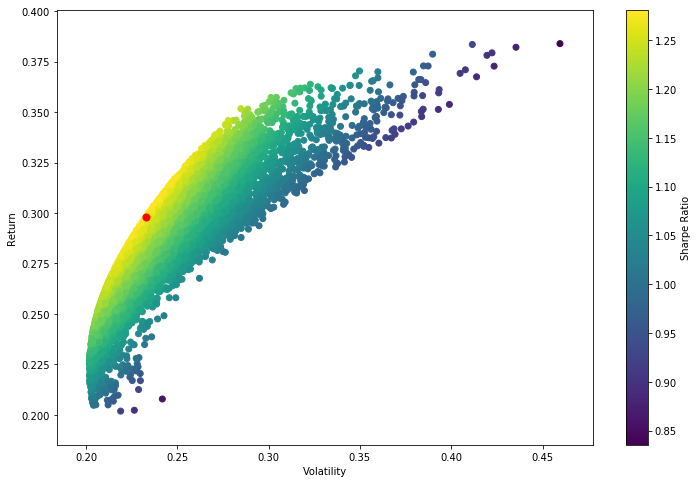

In [7]:
#plotting
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(mx_vol, mx_ret,c='red', s=50) # red dot
plt.show()